In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [2]:
#_PATH_DATASET = '../input/all/' # No borrar esto, por compatibilidad para correrlo con datasets en otros directorios
_PATH_DATASET = '/home/diego/Cursos/FIUBA/fiuba-trocafone-tp2-final-set/' # No borrar esto, por compatibilidad para correrlo con datasets en otros directorios

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
new_vector_features = pd.read_csv(_PATH_DATASET + 'out_features_processed_train.csv')
new_vector_features.head()
new_vector_features = new_vector_features.set_index('person')

> # Separación de test de entrenamiento y pruebas

In [5]:
x_data = new_vector_features.drop('label', axis = 1)
y_labels = new_vector_features.label

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.3,random_state=101)
x_data.columns

Index(['timestamp', 'last_inter_to_june', 'interactions', 'isNotWeekend',
       'isWeekend', 'isFortnite', 'isNotFortnite', 'month1', 'month2',
       'month3', 'month4', 'month5', 'ad campaign hit', 'brand listing',
       'checkout', 'conversion', 'generic listing', 'lead',
       'search engine hit', 'searched products', 'staticpage',
       'viewed product', 'visited site', '1.0', '2.0', '3.0', '4.0', '5.0'],
      dtype='object')

### Función que imprime la curva de precisión - recall

In [34]:
import matplotlib.pyplot as plt
import itertools
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

### Función que crea la matriz de confusión

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


> # Hago distintas pruebas

In [36]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

## Stochastig gradient descent

In [60]:
'''
This estimator implements regularized linear models with stochastic
gradient descent (SGD) learning: the gradient of the loss is estimated
each sample at a time and the model is updated along the way with a
decreasing strength schedule (aka learning rate). SGD allows minibatch
(online/out-of-core) learning, see the partial_fit method.
For best results using the default learning rate schedule, the data should
have zero mean and unit variance.
'''
sgd = linear_model.SGDClassifier(max_iter=150, tol=None)
'''
Ajustar el clasificador
Fit linear model with Stochastic Gradient Descent.
'''
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=150, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [61]:
'''
Returns the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy
which is a harsh metric since you require for each sample that
each label set be correctly predicted.
'''
print("Score en training set", 100*sgd.score(X_train, y_train), "%")
print("Score en testing set", 100*sgd.score(X_test, y_test), "%")

Score en training set 94.9665170358 %
Score en testing set 94.9184549356 %


In [62]:
'''
Predict class labels for samples in X.
'''
y_pred = sgd.predict(X_test)
print("Como se ajustó el modelo a los datos de entrada? ", 100*sgd.score(X_test, y_pred))


Como se ajustó el modelo a los datos de entrada?  100.0


In [63]:
sum(abs(y_test ))

296

In [64]:
sum(abs(y_train))

684

In [65]:
print("Mi error calculado: ", 100*(1-sum(abs(y_pred - y_test))/y_pred.shape[0]))

Mi error calculado:  94.91845493562232


In [66]:
new_vector_features_to_predict = pd.read_csv(_PATH_DATASET + 'out_features_processed_to_predict.csv')
new_vector_features_to_predict = new_vector_features_to_predict.set_index('person')

In [67]:
x_features_to_predict = new_vector_features_to_predict.drop('label', axis = 1)
y_labels_to_predict = new_vector_features_to_predict.label

In [68]:
y_labels_to_predict.label = 0

In [69]:
y_pred_unknown = sgd.predict(x_features_to_predict)

In [70]:
y_pred_unknown[y_pred_unknown==1]

array([], dtype=int64)

In [88]:
predictions = cross_val_predict(sgd, X_test, y_test, cv=3)
cnf_matrix = confusion_matrix(y_test, predictions)

ValueError: The number of class labels must be greater than one.

In [87]:
class_names = ['0', '1']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[5529    0]
 [ 296    0]]


## Random Forests


In [71]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=250)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_test, Y_prediction)
acc_random_forest = round(random_forest.score(X_test, Y_prediction) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [72]:
predictions = cross_val_predict(random_forest, X_test, y_test, cv=3)
cnf_matrix = confusion_matrix(y_test, predictions)

In [73]:
class_names = ['0', '1']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[5523    6]
 [ 293    3]]


In [74]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_pred, y_scores)

/home/diego/.local/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/metrics/ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


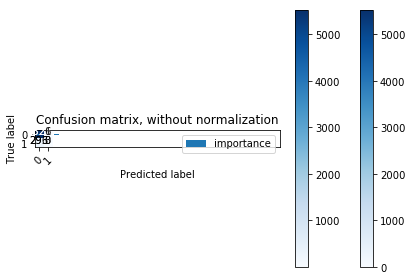

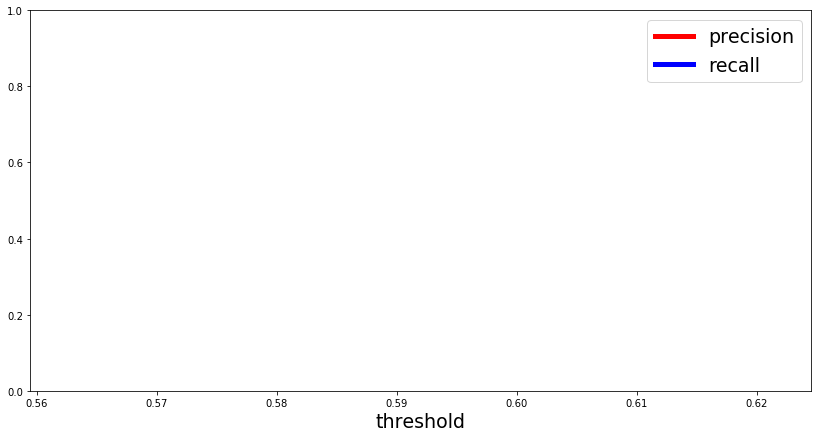

In [75]:
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [76]:
y_pred_unknown = random_forest.predict(x_features_to_predict)

In [77]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [78]:
importances.head(20)

,importance
feature,
last_inter_to_june,0.108
timestamp,0.080
checkout,0.073
interactions,0.050
viewed product,0.049
isWeekend,0.049
month5,0.049
isFortnite,0.045
2.0,0.045


In [79]:
importances.plot.bar()

In [80]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_test, Y_pred) * 100, 2)
print(round(acc_log,2,), "%")



100.0 %


In [81]:
predictions = cross_val_predict(logreg, X_test, y_test, cv=3)
cnf_matrix = confusion_matrix(y_test, predictions)

In [82]:
class_names = ['0', '1']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

Confusion matrix, without normalization
[[5528    1]
 [ 296    0]]
